## Project Title:            Algerian Forest Project
### Technology:              Machine Learning Technology
### Domain:                  Agriculture
### Project Difficulty Level: Intermediate

> Problem Statement:

The Goal is to predict the temperature of the forest. This is basically a Regression problem where the forest has recorded from June 2012 to September 2012.

> Dataset to downloaded from the below link:

https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

In [1]:
# Importing Libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None) # to disply all columns

In [2]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is BE09-1442

 Directory of d:\Data Scientist\1_iNeuron\02 Full Stack Data Science ineuron\03 Machine Learning\Algerian Forest\EDA-on-Algerian-Forest-Fires-Dataset

22-05-2023  16:19    <DIR>          .
22-05-2023  16:24    <DIR>          ..
19-05-2023  12:08            14,759 Algerian_forest_fires_dataset_UPDATE.csv
19-05-2023  14:40           137,819 Cleaning_Split.ipynb
19-05-2023  15:50           707,627 Data Preparation_test.ipynb
22-05-2023  18:10         2,385,310 Data Preparation_train.ipynb
19-05-2023  16:20            84,633 Exploratoty Data Analysis.ipynb
19-05-2023  12:08            35,823 LICENSE
19-05-2023  15:50             8,131 prepared_data_test.csv
19-05-2023  15:44            16,596 prepared_data_train.csv
22-05-2023  16:22           126,812 prepared_tranformed_data_train.csv
19-05-2023  12:08               125 README.md
19-05-2023  14:34             5,034 test.csv
19-05-2023  14:34            10,054 train.csv
 

In [5]:
dataset = pd.read_csv("train.csv")
# Finding the shape of dataset
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in the dataset\n")
dataset.head()

There are 162 rows and 15 columns in the dataset



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,11,7,2012,33,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,notfire,0.0
1,14,6,2012,30,78,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4,notfire,0.0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
3,16,6,2012,29,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1,notfire,1.0
4,25,6,2012,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,fire,0.0


In [6]:
# Finding the information about the dataset:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          162 non-null    int64  
 1   month        162 non-null    int64  
 2   year         162 non-null    int64  
 3   Temperature  162 non-null    int64  
 4   RH           162 non-null    int64  
 5   Ws           162 non-null    int64  
 6   Rain         162 non-null    float64
 7   FFMC         162 non-null    float64
 8   DMC          162 non-null    float64
 9   DC           162 non-null    float64
 10  ISI          162 non-null    float64
 11  BUI          162 non-null    float64
 12  FWI          162 non-null    float64
 13  Classes      162 non-null    object 
 14  Region       162 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 19.1+ KB


In [10]:
data.duplicated().sum()

0

In [11]:
data.nunique()

day             31
month            4
year             1
Temperature     19
RH              57
Ws              17
Rain            30
FFMC           124
DMC            125
DC             140
ISI             90
BUI            127
FWI            102
Classes          2
Region           2
dtype: int64

In [12]:
unique_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())==len(dataset)]
print("Unique feature Count {} out of {} features".format(len(unique_feature),len(dataset.columns)))
print(unique_feature)
# seperating the Numerical and Categorical Variables:
numerical_features = [fea for fea in dataset.columns if dataset[fea].dtype != 'O']
print("\n Numerical feature Count {}".format(len(numerical_features)))
print(numerical_features)
unique_feature=[feature for feature in numerical_features if len(dataset[feature].unique())==len(dataset)]
print("\n Unique feature Count {} out of {} features".format(len(unique_feature),len(numerical_features)))
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<15 and feature not in unique_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+unique_feature]
print("\n Continuous feature Count {} out of {} features".format(len(continuous_feature),len(numerical_features)))
print(continuous_feature)
print("\n Discrete Variables Count: {} out of {} features".format(len(discrete_feature),len(numerical_features)))
print(discrete_feature)
data = dataset.copy()
pd.DataFrame(list(zip(discrete_feature,[len(data[feature].unique()) for feature in discrete_feature], [data[str(feature)].unique() for feature in discrete_feature])), columns=['Discrete Features','No of Unique Values', 'Unique Values'])



Unique feature Count 0 out of 15 features
[]

 Numerical feature Count 14
['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']

 Unique feature Count 0 out of 14 features

 Continuous feature Count 11 out of 14 features
['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

 Discrete Variables Count: 3 out of 14 features
['month', 'year', 'Region']


,Discrete Features,No of Unique Values,Unique Values
0,month,4,"[7, 6, 9, 8]"
1,year,1,[2012]
2,Region,2,"[0.0, 1.0]"


In [13]:
categorical_features = [fea for fea in dataset.columns if dataset[fea].dtype == 'O']
print("Categorical feature Count {}".format(len(categorical_features)))
print(categorical_features)
data = dataset.copy()
pd.DataFrame(list(zip(categorical_features,[len(data[feature].unique()) for feature in categorical_features], [data[str(feature)].unique() for feature in categorical_features])), columns=['Categorical Features','No. of Categories', 'Categories'])

Categorical feature Count 1
['Classes']


,Categorical Features,No. of Categories,Categories
0,Classes,2,"[notfire, fire]"


In [14]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
day,162.0,NaN,NaN,NaN,16.296296,8.934467,1.0,9.0,17.0,24.0,31.0
month,162.0,NaN,NaN,NaN,7.450617,1.098008,6.0,6.25,7.0,8.0,9.0
year,162.0,NaN,NaN,NaN,2012.0,0.0,2012.0,2012.0,2012.0,2012.0,2012.0
Temperature,162.0,NaN,NaN,NaN,32.234568,3.737577,22.0,30.0,32.0,35.0,42.0
RH,162.0,NaN,NaN,NaN,61.462963,15.164169,21.0,51.25,62.0,74.5,90.0
Ws,162.0,NaN,NaN,NaN,15.450617,2.895815,8.0,14.0,15.0,17.0,29.0
Rain,162.0,NaN,NaN,NaN,0.764198,2.184861,0.0,0.0,0.0,0.475,16.8
FFMC,162.0,NaN,NaN,NaN,78.43642,13.955763,28.6,72.9,83.9,88.525,96.0
DMC,162.0,NaN,NaN,NaN,15.1,12.575165,0.7,5.85,11.75,20.9,65.9
DC,162.0,NaN,NaN,NaN,50.557407,47.780233,6.9,15.2,34.95,67.15,210.4


### 1.6 Info about dataset and its attributes

1. The dataset includes 243 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for Bejaia region and 121 for Sidi Bel-abbes region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (class)
5. The 243 instances have been classified into fire (137 classes) and notfire (106 classes) classes.

### Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire


In [9]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,WsiqrO,RainextO,RainiqrO,FFMCiqrO,DMCiqrO,DCiqrO,ISIiqrO,BUIiqrO,FWIiqrO,Classes_notfire
0,11,7,2012,33,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,0.0,14.0,0.0,0.0000,81.1000,8.1,18.7,2.6,8.1,2.2,1
1,14,6,2012,30,78,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4,0.0,20.0,0.5,0.5000,59.0000,4.6,7.8,1.0,4.4,0.4,1
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,13.0,1.9,1.1875,49.4625,1.3,6.9,0.0,1.7,0.0,1
3,16,6,2012,29,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1,1.0,15.0,0.4,0.4000,49.4625,4.2,8.0,0.2,4.1,0.1,1
4,25,6,2012,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0.0,15.0,0.0,0.0000,86.7000,14.2,63.8,5.7,18.3,8.4,0


# Question: Which month has high temperature range?


<AxesSubplot:xlabel='month'>

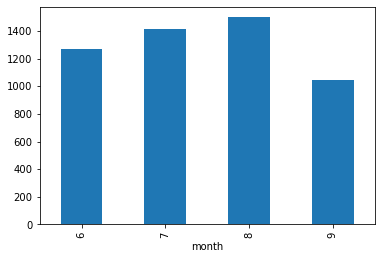

In [23]:
data.groupby('month')['Temperature'].sum().plot.bar()

- August is the month with highest sum of temperature.
# Question: Which region has highest temperature?
- Region 0 for Bejaia region and 1 for Sidi Bel-abbes region

<AxesSubplot:xlabel='Region'>

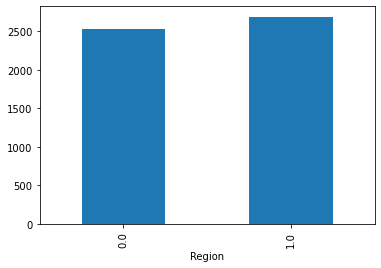

In [25]:
data.groupby('Region')['Temperature'].sum().plot.bar()

- Region 1 for Sidi Bel-abbes region has highest sum of Temperature.
# Question: What is the relationship between rain and temperature?

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

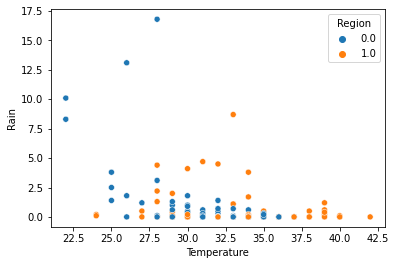

In [42]:
sns.scatterplot(data =data,x= 'Temperature',y= 'Rain',hue='Region',)

In [15]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,11,7,2012,33,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,notfire,0.0
1,14,6,2012,30,78,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4,notfire,0.0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
3,16,6,2012,29,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1,notfire,1.0
4,25,6,2012,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,fire,0.0


Question: What is the number of entries high temperature?

In [23]:
data.Temperature.unique()

array([33, 30, 25, 29, 31, 35, 36, 38, 32, 37, 39, 28, 24, 34, 26, 22, 27,
       42, 40], dtype=int64)

In [49]:
high_temp = data[data['Temperature'] > 39]['Temperature'].count()
low_temp = data[data['Temperature'] < 26]['Temperature'].count()

print(f'Number of entries having temperature above 40 celsius degree: {high_temp}')
print(f'Number of entries having temperature below 24 celsius degree: {low_temp}')

Number of entries having temperature above 40 celsius degree: 4
Number of entries having temperature below 24 celsius degree: 7


In [43]:
data[data['Temperature'] > 39]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
94,17,8,2012,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,fire,1.0
108,2,8,2012,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,13.5,fire,1.0
130,16,8,2012,40,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,fire,1.0
158,11,8,2012,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,21.6,fire,1.0


In [48]:
data[data['Temperature'] < 26]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
24,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,notfire,1.0
53,2,9,2012,22,86,15,10.1,30.5,0.7,7.0,0.0,1.1,0.0,notfire,0.0
58,3,9,2012,25,78,15,3.8,42.6,1.2,7.5,0.1,1.7,0.0,notfire,0.0
73,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1.0
77,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,notfire,0.0
96,14,9,2012,22,76,26,8.3,47.4,1.1,7.0,0.4,1.6,0.1,notfire,0.0


**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire



#### Observation:
- Below 24 degree celsius classes is NotFire.
- Above 39 degree celsius classes is Fire

# Exploring Data ( Visualization )
#### 4.1 Visualize temperature distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

In [51]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,11,7,2012,33,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,notfire,0.0
1,14,6,2012,30,78,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4,notfire,0.0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
3,16,6,2012,29,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1,notfire,1.0
4,25,6,2012,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,fire,0.0


In [52]:
discrete_feature

['month', 'year', 'Region']

In [55]:
categorical_features

['Classes']

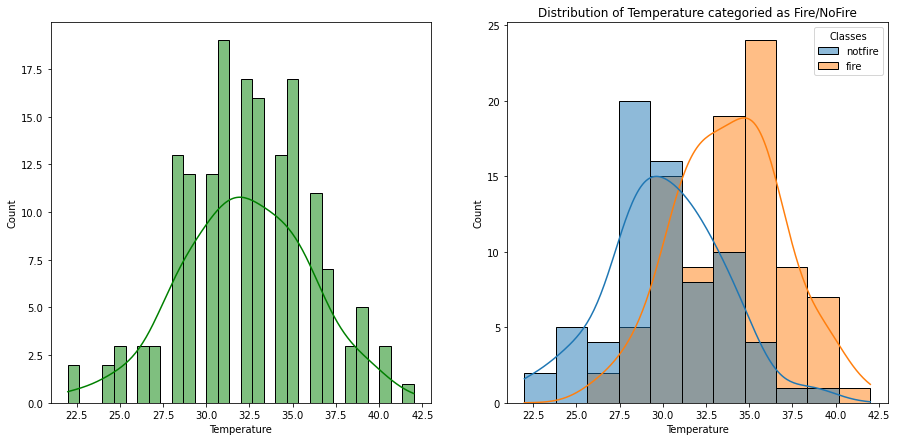

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.title('Distribution of Temperature Categoried as Fire/NoFire')
plt.subplot(121)
sns.histplot(data=data,x='Temperature',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Temperature',kde=True,hue='Classes')
plt.show()

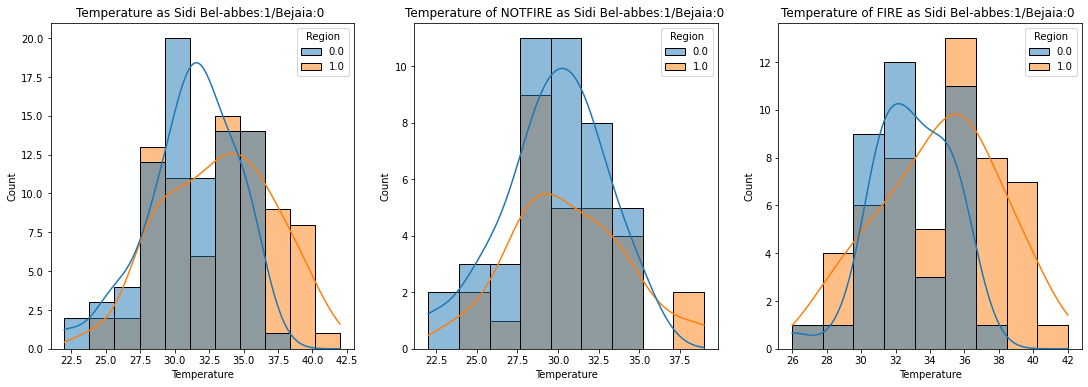

In [61]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Temperature',kde=True,hue='Region')
plt.title('Temperature as Sidi Bel-abbes:1/Bejaia:0 ')
plt.subplot(142)
sns.histplot(data=data[data.Classes=='notfire'],x='Temperature',kde=True,hue='Region')
plt.title('Temperature of NOTFIRE as Sidi Bel-abbes:1/Bejaia:0 ')
plt.subplot(143)
sns.histplot(data=data[data.Classes=='fire'],x='Temperature',kde=True,hue='Region')
plt.title('Temperature of FIRE as Sidi Bel-abbes:1/Bejaia:0 ')
plt.show()

In [ ]:
## Observation:
- 

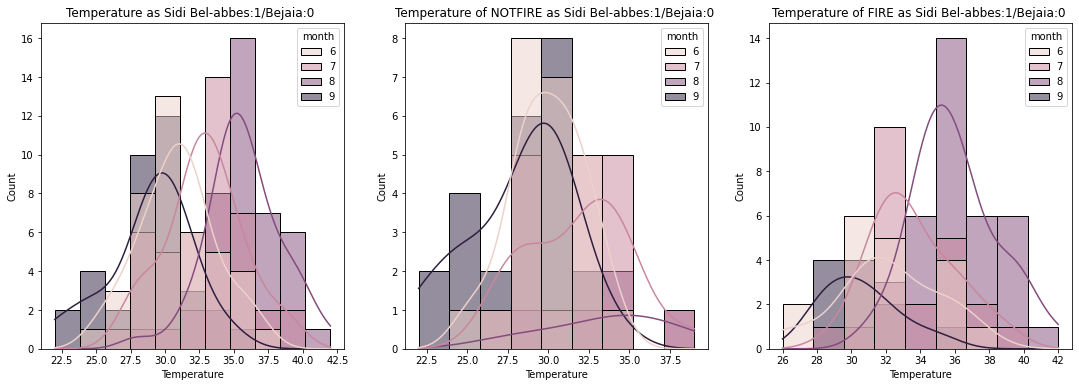

In [62]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Temperature',kde=True,hue='month')
plt.title('Temperature as Sidi Bel-abbes:1/Bejaia:0 ')
plt.subplot(142)
sns.histplot(data=data[data.Classes=='notfire'],x='Temperature',kde=True,hue='month')
plt.title('Temperature of NOTFIRE as Sidi Bel-abbes:1/Bejaia:0 ')
plt.subplot(143)
sns.histplot(data=data[data.Classes=='fire'],x='Temperature',kde=True,hue='month')
plt.title('Temperature of FIRE as Sidi Bel-abbes:1/Bejaia:0 ')
plt.show()

<AxesSubplot:ylabel='Temperature'>

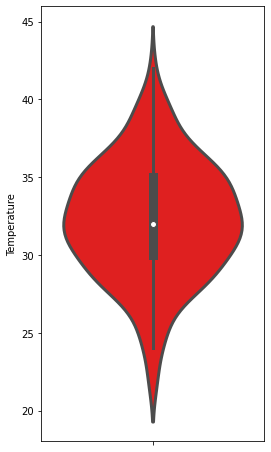

In [66]:

plt.figure(figsize=(4,8))
sns.violinplot(y='Temperature',data=data,color='red',linewidth=3)

#### 4.3 Multivariate analysis using pieplot

In [68]:
print(discrete_feature,categorical_features)
# Region 0 for Bejaia region and 1 for Sidi Bel-abbes region

['month', 'year', 'Region'] ['Classes']


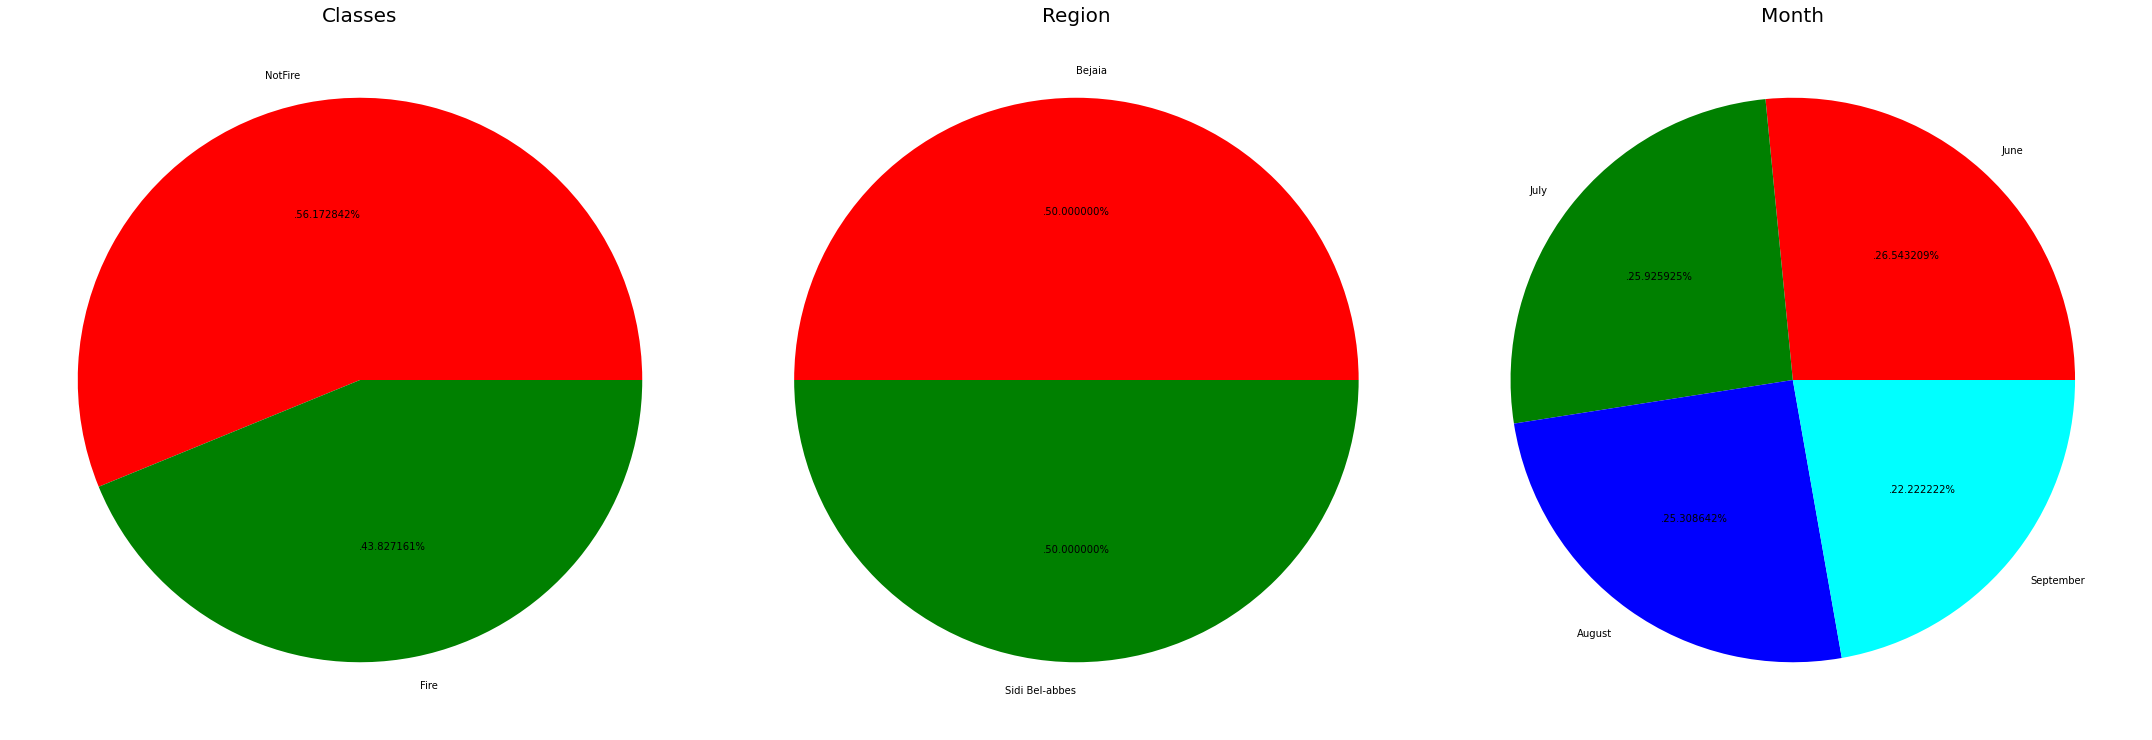

In [69]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 3, 1)
size = data['Classes'].value_counts()
labels = 'NotFire', 'Fire'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Classes', fontsize = 20)
plt.axis('off')



plt.subplot(1, 3, 2)
size = data['Region'].value_counts()
labels = 'Bejaia', 'Sidi Bel-abbes'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Region', fontsize = 20)
plt.axis('off')



plt.subplot(1, 3, 3)
size = data['month'].value_counts()
labels = 'June', 'July', 'August', 'September'
color = ['red', 'green', 'blue', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Month', fontsize = 20)
plt.axis('off')



plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Regions is almost equal
- Number NotFire is greater than Fire.
- - Number of Month entries is almost equal


# 4.4 Feature Wise Visualization
#### 4.4.1 CLASSES COLUMN
- How is distribution of Classes ?
- Is Classes has any impact on temperature ?

#### UNIVARIATE ANALYSIS ( How is distribution of Classes ? )

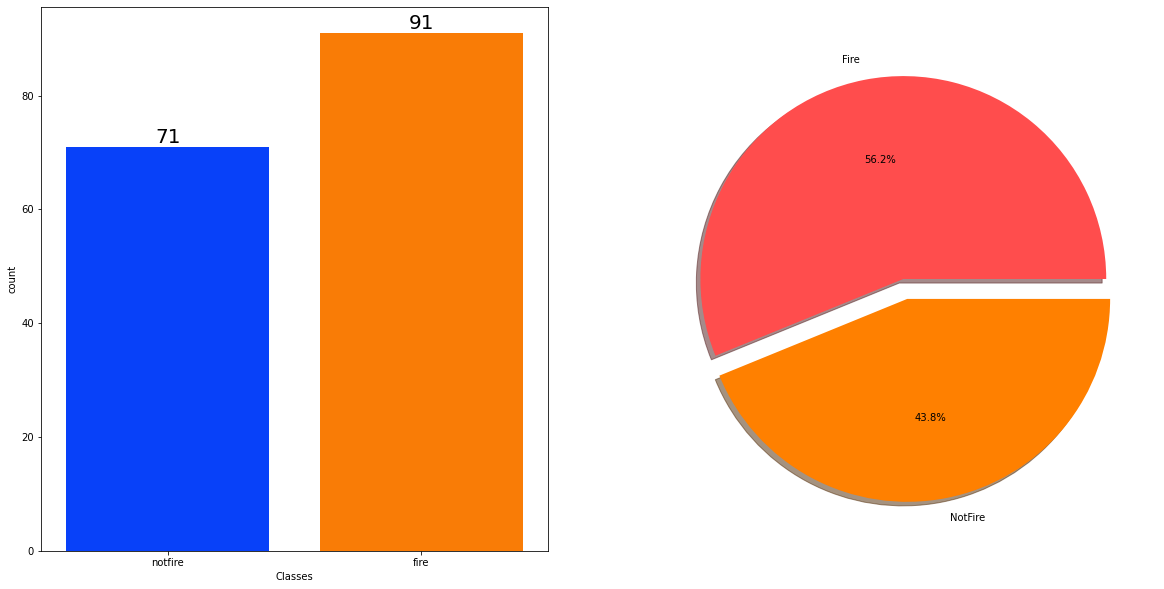

In [71]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['Classes'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['Classes'].value_counts(),labels=['Fire','NotFire'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Classes has balanced data with fire are 91 (43.8%) and notfire are 71 (56.2%) 
#### BIVARIATE ANALYSIS ( Is Classes has any impact on temperature ? ) 

In [78]:
class_group = data.groupby('Classes').mean()
class_group

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Classes,,,,,,,,,,,,,,
fire,17.670330,7.450549,2012.0,33.890110,55.846154,15.230769,0.037363,87.863736,21.916484,73.849451,7.704396,25.043956,12.213187,0.582418
notfire,14.535211,7.450704,2012.0,30.112676,68.661972,15.732394,1.695775,66.353521,6.363380,20.704225,1.346479,7.201408,1.015493,0.394366


<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

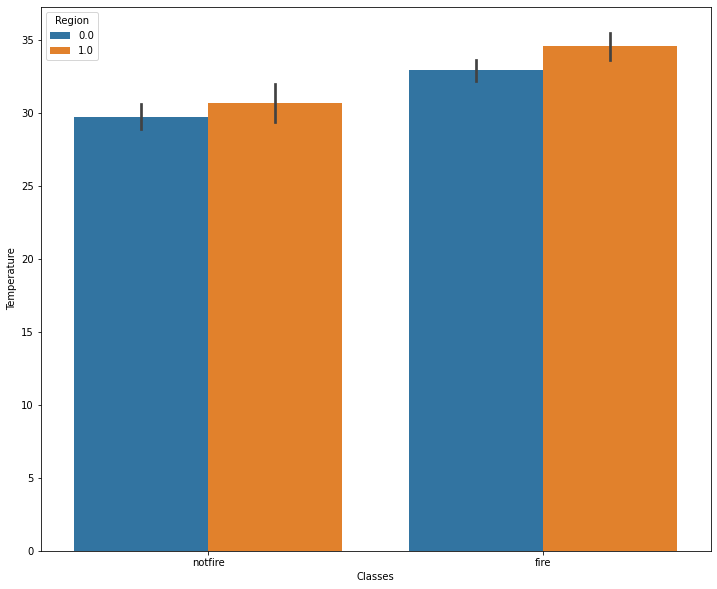

In [85]:
plt.figure(figsize=(12,10))
sns.barplot (x=data['Classes'], y=data['Temperature'],hue=data['Region'])

In [87]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


#### 4.4.2 CLASSES COLUMN
- How is distribution of month ?
- Is month has any impact on temperature ?

#### UNIVARIATE ANALYSIS ( How is distribution of month ? )

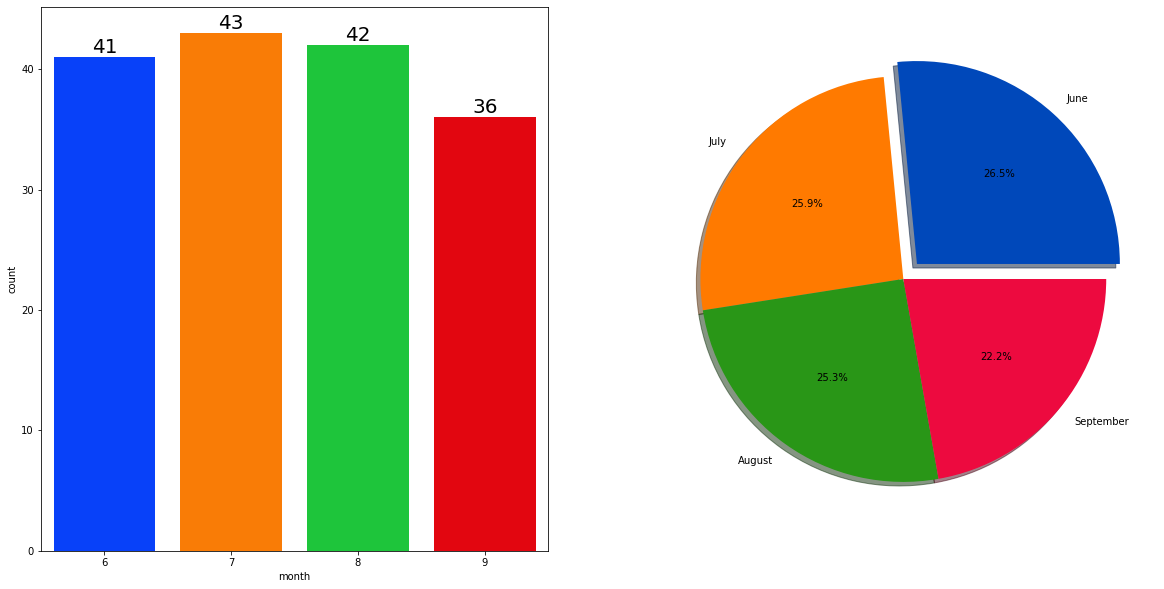

In [103]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['month'],data=data,ax=ax[0],saturation=0.95,palette ='bright')
#
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['month'].value_counts(),labels = ['June', 'July', 'August', 'September'],explode=[0.1,0,0,0],autopct='%1.1f%%',shadow=True,colors = ['#0048BA', '#FF7A00', '#299617', '#ED0A3F'])
plt.show()

#### BIVARIATE ANALYSIS ( Is month has any impact on temperature ? ) 

<AxesSubplot:xlabel='month', ylabel='Temperature'>

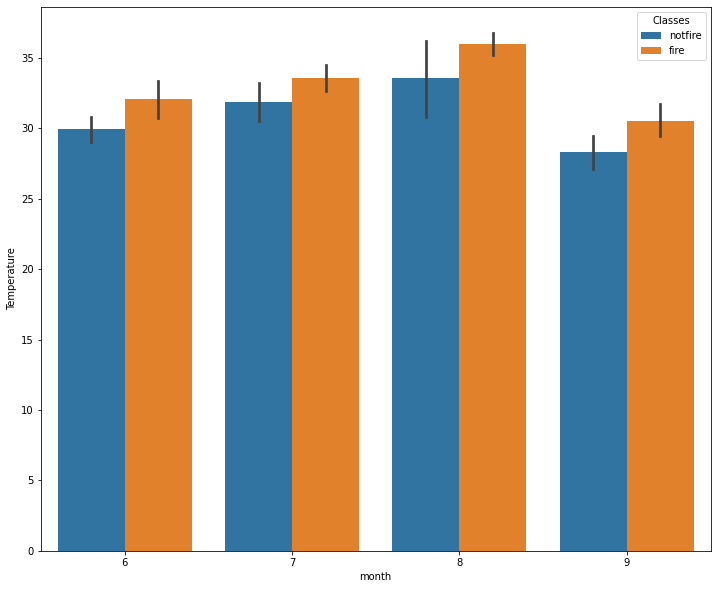

In [106]:
plt.figure(figsize=(12,10))
sns.barplot (x=data['month'], y=data['Temperature'],hue=data['Classes'])

<AxesSubplot:xlabel='month', ylabel='Temperature'>

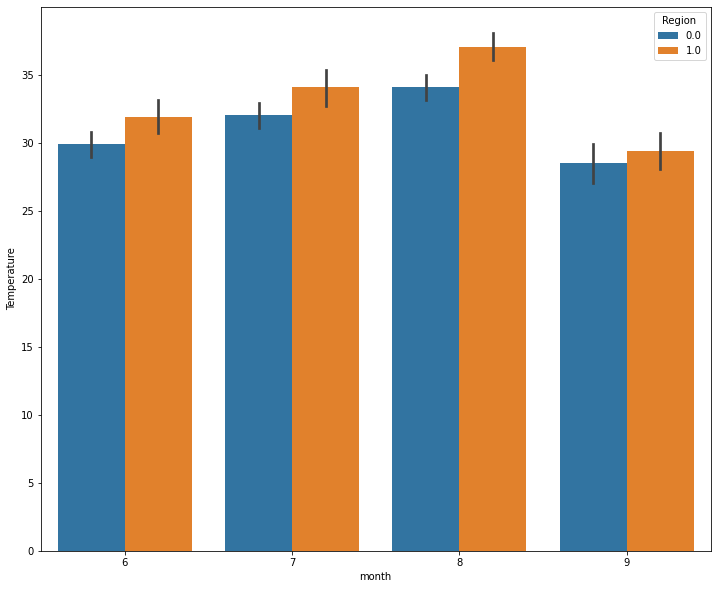

In [107]:
plt.figure(figsize=(12,10))
sns.barplot (x=data['month'], y=data['Temperature'],hue=data['Region'])

In [114]:
print(categorical_features, discrete_feature)

['Classes'] ['month', 'year', 'Region']
